# NLIP. Home assignment 1.                                  Zhanna Azizova

In [1]:
# load libraries

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import sklearn.metrics as metrics

from scipy.stats import randint as sp_randint
from time import time

from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
# function to estimate model performance and draw the AUC-ROC curve

def model_performance(model_name, X_tr, y_tr, y_te, y_pred):
    print('Model name: %s'%model_name)
    print('-----------------------------------')
    print('Test accuracy (Accuracy Score): %0.2f'%metrics.accuracy_score(y_te, y_pred))
    print('Test precision 0: %0.2f'%metrics.precision_score(y_te, y_pred, pos_label=0))   
    print('Test precision 1: %0.2f'%metrics.precision_score(y_te, y_pred, pos_label=1)) 
    print('Test recall 0: %0.2f'%metrics.recall_score(y_te, y_pred, pos_label=0))   
    print('Test recall 1: %0.2f'%metrics.recall_score(y_te, y_pred, pos_label=1))
    print('-----------------------------------')
    print('Test accuracy (ROC AUC Score): %0.2f'%metrics.roc_auc_score(y_te, y_pred))

    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_te, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

    # making the graph
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## 0. Data pre-processing

In [3]:
# reading the data 
data = pd.read_csv('dataset_simple.csv')

In [4]:
data.shape

(9999, 1001)

In [5]:
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,label
0,-0.272674,0.801643,-0.650531,0.952486,-0.153037,0.427145,-1.085534,1.318513,0.002588,-1.849832,...,-0.572848,-0.448690,0.073369,-0.845503,-1.074903,0.222103,-1.024658,-0.711647,0.036411,1
1,0.201004,-0.263537,-0.793137,-4.483672,0.745123,1.156577,0.351558,1.735511,-1.490988,-0.327063,...,1.045496,1.494638,-0.776573,-1.219524,-0.756398,-0.963046,0.488610,0.313609,-0.490794,0
2,-1.834495,-0.305209,0.053789,4.448289,1.294481,1.241900,-1.358354,-0.211469,-0.186544,0.964812,...,0.917945,0.920003,0.690022,-0.834381,-0.261806,-0.061880,-1.177730,-1.345305,-0.085971,0
3,-0.484526,0.473056,-0.345463,-7.375136,-0.817676,-0.778446,0.909734,-0.677147,-1.913900,-0.087426,...,0.598949,0.078195,0.024128,1.308711,0.943230,0.903181,0.501013,2.639802,1.540640,1
4,-0.032351,0.247055,-0.351119,-2.669246,-1.068889,0.322954,1.101136,1.817973,0.944537,0.406005,...,-0.851188,1.272217,0.172442,-0.509007,0.357073,0.523263,0.965078,0.297335,0.088714,1


In [6]:
data.groupby('label').size() # The classes in the sample are balances

label
0    5068
1    4931
dtype: int64

In [7]:
X, y = data.drop('label', axis = 1), data['label']
X.shape

(9999, 1000)

## 1. Feature selection

### 1.1. L1-based feature selection


In [8]:
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new_1 = model.transform(X)
X_new_1.shape

(9999, 88)

### 1.2. Tree-based feature selection

In [9]:
clf = ExtraTreesClassifier(n_estimators=500)
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new_2 = model.transform(X)
X_new_2.shape  

(9999, 110)

There are several ways to organize feature selection procedure but I have selected the second one after testing two X_new samples. 110 features give slightly better results.

In [10]:
X_new = X_new_2 

# 2. Building classifiers

### 2.1. Splitting the dataset 

In [11]:
# make a fixed split into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.40, random_state=43)

### 2.2. Training  models (default parameters)

In [12]:
clfr_LG = LogisticRegression().fit(X_train, y_train) # Logistic regression
clfr_DT = DecisionTreeClassifier().fit(X_train, y_train) # Decision trees classifier
clfr_RF = RandomForestClassifier().fit(X_train, y_train)  # Random forest classifier
clfr_GB = GradientBoostingClassifier().fit(X_train, y_train)  # Gradient Boosting
clfr_MLP = MLPClassifier().fit(X_train, y_train) # Multi-layer Perceptron¶

### 2.3. Testing  models (fixed split 60/40). Evaluation of results.

#### Logistic regression

Model name: Logistic regression
-----------------------------------
Test accuracy (Accuracy Score): 0.84
Test precision 0: 0.85
Test precision 1: 0.83
Test recall 0: 0.83
Test recall 1: 0.84
-----------------------------------
Test accuracy (ROC AUC Score): 0.84


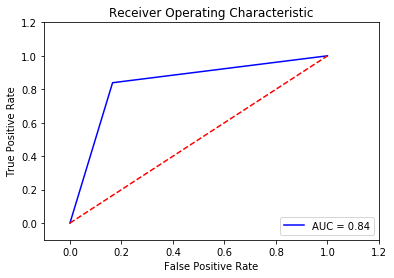

In [13]:
y_pred_LG= clfr_LG.predict(X_test)
model_performance('Logistic regression', X_tr=X_train, y_tr=y_train, y_te=y_test, y_pred=y_pred_LG)

#### Decision Tree

Model name: Decision tree classifier
-----------------------------------
Test accuracy (Accuracy Score): 0.69
Test precision 0: 0.69
Test precision 1: 0.68
Test recall 0: 0.70
Test recall 1: 0.67
-----------------------------------
Test accuracy (ROC AUC Score): 0.68


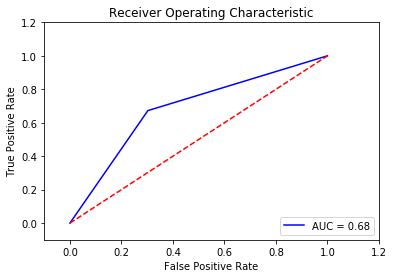

In [14]:
y_pred_DT= clfr_DT.predict(X_test)
model_performance('Decision tree classifier', X_tr=X_train, y_tr=y_train, y_te=y_test, y_pred=y_pred_DT)

#### Random Forest classifier

Model name: Random Forest classifier
-----------------------------------
Test accuracy (Accuracy Score): 0.75
Test precision 0: 0.72
Test precision 1: 0.78
Test recall 0: 0.82
Test recall 1: 0.67
-----------------------------------
Test accuracy (ROC AUC Score): 0.75


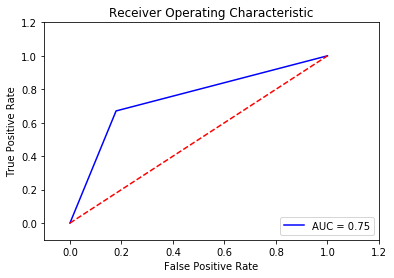

In [15]:
# checking performance of the RF-model
y_pred_RF= clfr_RF.predict(X_test)
model_performance('Random Forest classifier', X_tr=X_train, y_tr=y_train, y_te=y_test, y_pred=y_pred_RF)

#### Gradient Tree Boosting

Model name: Gradient Tree Boosting
-----------------------------------
Test accuracy (Accuracy Score): 0.86
Test precision 0: 0.86
Test precision 1: 0.85
Test recall 0: 0.86
Test recall 1: 0.85
-----------------------------------
Test accuracy (ROC AUC Score): 0.86


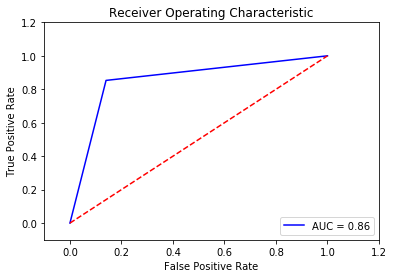

In [16]:
y_pred_GB= clfr_GB.predict(X_test)
model_performance('Gradient Tree Boosting', X_tr=X_train, y_tr=y_train, y_te=y_test, y_pred=y_pred_GB)

#### ANN: Multi-layer Perceptron

Model name: Multi-layer Perceptron
-----------------------------------
Test accuracy (Accuracy Score): 0.96
Test precision 0: 0.96
Test precision 1: 0.95
Test recall 0: 0.96
Test recall 1: 0.96
-----------------------------------
Test accuracy (ROC AUC Score): 0.96


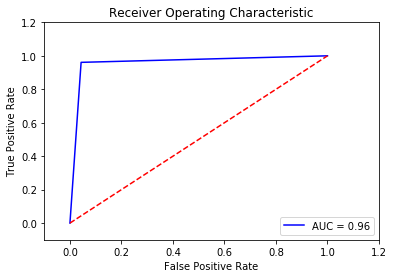

In [17]:
y_pred_MLP= clfr_MLP.predict(X_test)
model_performance('Multi-layer Perceptron', X_tr=X_train, y_tr=y_train, y_te=y_test, y_pred=y_pred_MLP)

## 3. Cross validation

In [18]:
def cross_val_results(model_name, model, X, y, cv):
    scores = cross_validate(model, X, y, cv=cv, scoring=('roc_auc'))
    print('Model name: %s'%model_name)
    print('------------------------------')
    print("AUC scores", scores['test_score'].round(4))
    # with 95% confidence interval
    print("AUC 95 prc confidence interval: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))
    print('______________________________')
    print(" ")

In [19]:
cross_val_results('Logistic regression', clfr_LG, X_new, y, cv=3)
cross_val_results('Decision tree', clfr_DT, X_new, y, cv=3)
cross_val_results('Random Forest classifier', clfr_RF, X_new, y, cv=3)
cross_val_results('Gradient Tree Boosting', clfr_GB, X_new, y, cv=3)
cross_val_results('Multi-layer Perceptron', clfr_MLP, X_new, y, cv=3)

Model name: Logistic regression
------------------------------
AUC scores [0.9133 0.9121 0.9141]
AUC 95 prc confidence interval: 0.91 (+/- 0.00)
______________________________
 
Model name: Decision tree
------------------------------
AUC scores [0.6598 0.6663 0.6797]
AUC 95 prc confidence interval: 0.67 (+/- 0.02)
______________________________
 
Model name: Random Forest classifier
------------------------------
AUC scores [0.844  0.8392 0.8327]
AUC 95 prc confidence interval: 0.84 (+/- 0.01)
______________________________
 
Model name: Gradient Tree Boosting
------------------------------
AUC scores [0.9323 0.9349 0.9335]
AUC 95 prc confidence interval: 0.93 (+/- 0.00)
______________________________
 
Model name: Multi-layer Perceptron
------------------------------
AUC scores [0.9899 0.9885 0.9876]
AUC 95 prc confidence interval: 0.99 (+/- 0.00)
______________________________
 


I have selected the following models for further optimization:
    * Multi-layer Perceptron
    * Gradient Tree Boosting 
    * Logistic regression
These models are the best performers with default parameters. 

## 4. Hyper parameters tuning



In [20]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation AUC score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

#### Logistic regression

In [23]:
# use a full grid over all parameters
param_grid = {"solver": ['warn','lbfgs', 'liblinear', 'sag'],
              "penalty": ['l2'],
              "C": [0.5, 1.0, 3.0]}

# run grid search
grid_search = GridSearchCV(clfr_LG, param_grid=param_grid, cv=3, scoring=('roc_auc'))
start = time()
grid_search.fit(X_new, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'solver': ['warn', 'lbfgs', 'liblinear', 'sag'], 'penalty': ['l2'], 'C': [0.5, 1.0, 3.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [24]:
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 12.75 seconds for 12 candidate parameter settings.
Model with rank: 1
Mean validation AUC score: 0.913 (std: 0.001)
Parameters: {'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}

Model with rank: 2
Mean validation AUC score: 0.913 (std: 0.001)
Parameters: {'C': 0.5, 'penalty': 'l2', 'solver': 'warn'}

Model with rank: 2
Mean validation AUC score: 0.913 (std: 0.001)
Parameters: {'C': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}



#### Gradient Tree Boosting

In [27]:
param_grid = {"loss": ['deviance', 'exponential'],
              "n_estimators": [100, 500],
              "max_features": [None, 50]}

# run grid search
grid_search = GridSearchCV(clfr_GB, param_grid=param_grid, cv=3, scoring=('roc_auc'))
start = time()
grid_search.fit(X_new, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'loss': ['deviance', 'exponential'], 'n_estimators': [100, 500], 'max_features': [None, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [28]:
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 565.15 seconds for 8 candidate parameter settings.
Model with rank: 1
Mean validation AUC score: 0.967 (std: 0.001)
Parameters: {'loss': 'deviance', 'max_features': None, 'n_estimators': 500}

Model with rank: 2
Mean validation AUC score: 0.967 (std: 0.001)
Parameters: {'loss': 'deviance', 'max_features': 50, 'n_estimators': 500}

Model with rank: 3
Mean validation AUC score: 0.966 (std: 0.001)
Parameters: {'loss': 'exponential', 'max_features': 50, 'n_estimators': 500}



#### ANN: Multi-layer Perceptron

In [29]:
param_grid = {"activation": ['logistic', 'tanh', 'relu'],
              "solver": ['lbfgs', 'sgd', 'adam'],
              "learning_rate_init": [0.001, 0.0001]}

# run grid search
grid_search = GridSearchCV(clfr_MLP, param_grid=param_grid, cv=3, scoring=('roc_auc'))
start = time()
grid_search.fit(X_new, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'activation': ['logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'learning_rate_init': [0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [30]:
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 391.91 seconds for 18 candidate parameter settings.
Model with rank: 1
Mean validation AUC score: 0.989 (std: 0.001)
Parameters: {'activation': 'relu', 'learning_rate_init': 0.001, 'solver': 'adam'}

Model with rank: 2
Mean validation AUC score: 0.988 (std: 0.002)
Parameters: {'activation': 'relu', 'learning_rate_init': 0.001, 'solver': 'lbfgs'}

Model with rank: 3
Mean validation AUC score: 0.987 (std: 0.001)
Parameters: {'activation': 'relu', 'learning_rate_init': 0.0001, 'solver': 'lbfgs'}



## 5. Model selection

** As we can see, in this case the best algorithm for classification is ANN (multi-layer Perceptron) with the following parameters: **
* activation: 'relu'
* learning_rate_init: 0.001, 
* solver: 'adam'

** The model gives robust AUC score 99% what is almost a perfect classifier.**